<a href="https://colab.research.google.com/github/Vrutik-Patwa/DeepLearning/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [20]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [21]:
X_test.shape

(10000, 28, 28)

In [22]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

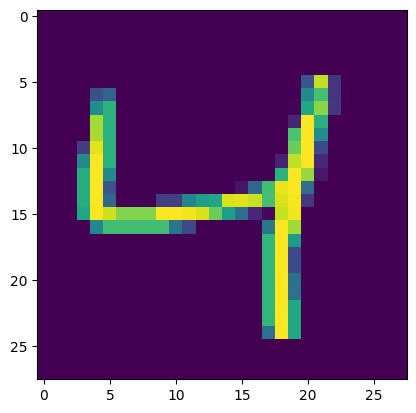

In [23]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [24]:
X_train = X_train/255
X_test = X_test/255

In [25]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [30]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [33]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2820 - accuracy: 0.9193 - val_loss: 0.1562 - val_accuracy: 0.9565
Epoch 2/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1196 - accuracy: 0.9640 - val_loss: 0.1157 - val_accuracy: 0.9672
Epoch 3/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0810 - accuracy: 0.9752 - val_loss: 0.0954 - val_accuracy: 0.9729
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0622 - accuracy: 0.9809 - val_loss: 0.1012 - val_accuracy: 0.9706
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0463 - accuracy: 0.9854 - val_loss: 0.0928 - val_accuracy: 0.9747
Epoch 6/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0366 - accuracy: 0.9881 - val_loss: 0.0856 - val_accuracy: 0.9768
Epoch 7/25
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0319 - accuracy: 0.9895 - val_loss: 0.0969 - val_accura

In [12]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [13]:
y_pred = y_prob.argmax(axis=1)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9734

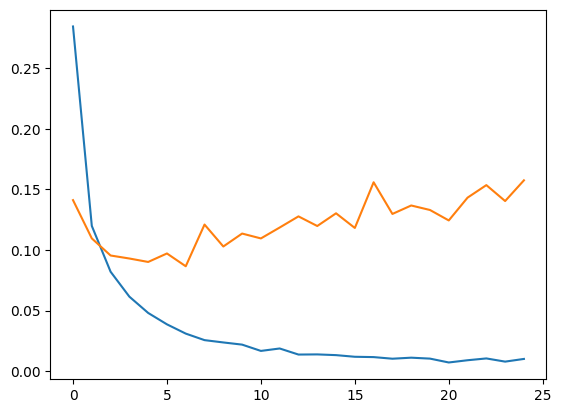

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

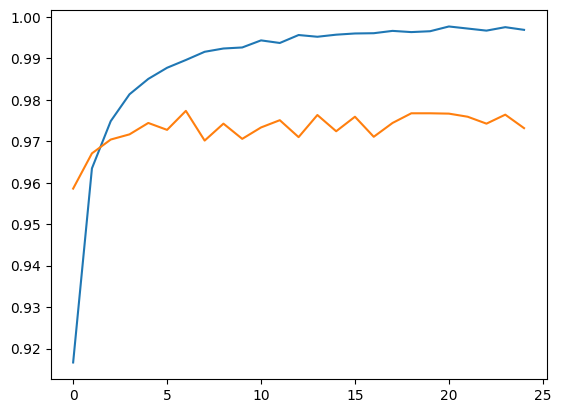

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

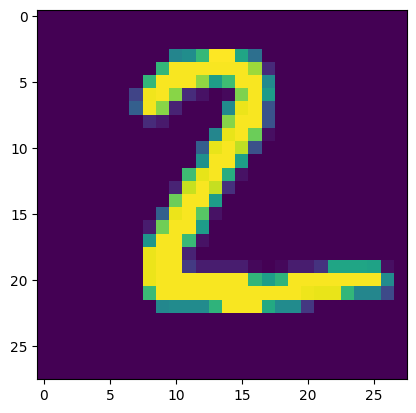

In [17]:
plt.imshow(X_test[1])

In [18]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 19ms/step


array([2])